In [1]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1

In [2]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

#b1 = np.sqrt(2)*np.dot(R,a1);  b2 =a2 #np.sqrt(2)*np.dot(R,a2); #a2
b1 = [np.sqrt(2),0]; b2=[0,np.sqrt(2)];

B  = np.transpose([b1,b2]);

a = A#np.array([[0,1],[1,0]])
b = B#np.array([[0,5],[5,0]])

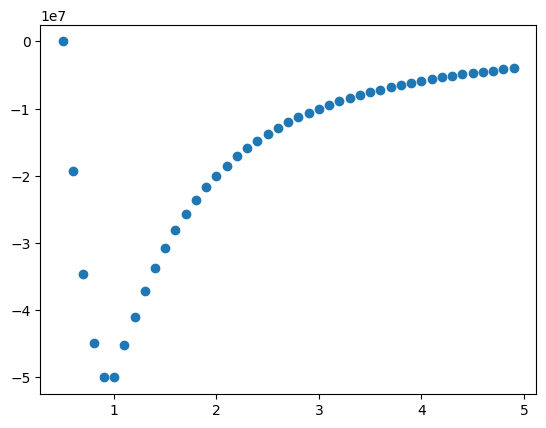

In [3]:
def at_sin(x, up =99999999):
    
    tr_x= (x + 0.5)
    
    if x<1:
        res = up*(1/(1+np.sqrt((x**2))) )* np.sin(tr_x*np.pi) +1/(x+0.00000000000001)
    else:
        res = (x-1)**2 -up*(1/(1+x**2))+1/(x+0.00000000000001)
    return res

X = [i*0.1 for i in range(0,50,1)]
Y= [at_sin(x) for x in X]

plt.scatter(X[5:],Y[5:])

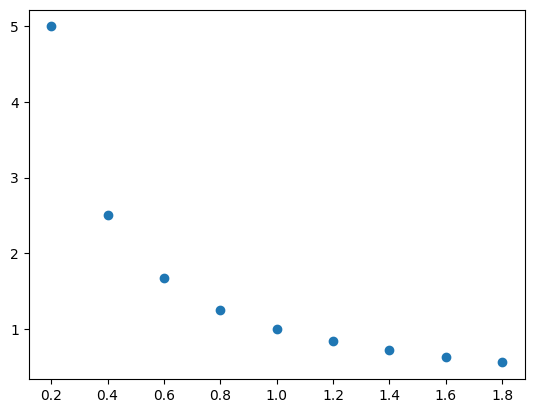

In [4]:
X = [i*0.2 for i in range(1,10,1)]
Y= [ 1/(x+0.00001) for x in X]

plt.scatter(X,Y)

In [5]:
# a = np.array([[0,1],[1,0]])
# b = np.sqrt(2)*np.array([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =9999999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        up =9999
        if(detTAa>1):
            up=up/2
        f =  at_sin(detTAa)+ tB_con**2 +( (tA[0][0]**2+tA[0][1]**2)+(tA[1][0]**2+tA[1][1]**2) )*100
        #((1-detTAa)**2)*k_p + tB_con**2
        
        
        return f 

In [6]:
# Experiment settings

#Hyperparameters of the model
up = 99999999
model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-2*bond,2*bond] for _ in range(4)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'known_min': -up
    
}



#
input_size = 4 # since our function has one variable this is a trivial scenario.
start_point = [1,5,3,2]

# Experiment
experiment = Annealing1(fit_fucntion ,start_point, model_par)

In [7]:
epochs= 40
history_book = experiment.evolve( epochs, prints_p=5)

temp:4|epoch:0|change:-19141693526449.406|value:4653838539088.096
temp:4|epoch:5|change:10541336070624.518|value:579403542811.9302
temp:4|epoch:10|change:16197512022615.863|value:579403542811.9302
temp:4|epoch:15|change:12069701507950.22|value:408645352948.38025
temp:4|epoch:20|change:25142771878003.61|value:408645352948.38025
temp:4|epoch:25|change:102644900928.24963|value:408645352948.38025
temp:4|epoch:30|change:12429075175033.459|value:408645352948.38025
temp:4|epoch:35|change:6610427958510.657|value:408645352948.38025
temp:0.0975609756097561|epoch:0|change:28372094167479.902|value:242128053830.16153
temp:0.0975609756097561|epoch:5|change:18373426113142.9|value:242128053830.16153
temp:0.0975609756097561|epoch:10|change:13330480855158.453|value:242128053830.16153
temp:0.0975609756097561|epoch:15|change:8598450058639.716|value:242128053830.16153
temp:0.0975609756097561|epoch:20|change:24549113523487.05|value:242128053830.16153
temp:0.0975609756097561|epoch:25|change:20118427050845.61

temp:0.007130124777183602|epoch:10|change:16805670393144.545|value:7249965972.958391
temp:0.007130124777183602|epoch:15|change:5592932824868.608|value:7249965972.958391
temp:0.007130124777183602|epoch:20|change:191579111745.6535|value:7249965972.958391
temp:0.007130124777183602|epoch:25|change:7448254345306.816|value:7249965972.958391
temp:0.007130124777183602|epoch:30|change:29705897332849.04|value:7249965972.958391
temp:0.007130124777183602|epoch:35|change:702096393473.6263|value:7249965972.958391
temp:0.006655574043261232|epoch:0|change:4665411337508.969|value:7249965972.958391
temp:0.006655574043261232|epoch:5|change:1283836440570.0862|value:7249965972.958391
temp:0.006655574043261232|epoch:10|change:20624962478845.855|value:7249965972.958391
temp:0.006655574043261232|epoch:15|change:11655442752505.193|value:7249965972.958391
temp:0.006655574043261232|epoch:20|change:19713922222300.31|value:7249965972.958391
temp:0.006655574043261232|epoch:25|change:24327610047694.086|value:7249965

temp:0.0035682426404995546|epoch:15|change:11142411499976.115|value:7249965972.958391
temp:0.0035682426404995546|epoch:20|change:20854208049138.07|value:7249965972.958391
temp:0.0035682426404995546|epoch:25|change:3309076365856.461|value:7249965972.958391
temp:0.0035682426404995546|epoch:30|change:23138947049827.895|value:7249965972.958391
temp:0.0035682426404995546|epoch:35|change:24326352106220.098|value:7249965972.958391
temp:0.0034453057708871667|epoch:0|change:16600477085655.125|value:7249965972.958391
temp:0.0034453057708871667|epoch:5|change:46869870422717.25|value:7249965972.958391
temp:0.0034453057708871667|epoch:10|change:16977168800253.352|value:7249965972.958391
temp:0.0034453057708871667|epoch:15|change:16805496301519.482|value:7249965972.958391
temp:0.0034453057708871667|epoch:20|change:7282058713445.241|value:7249965972.958391
temp:0.0034453057708871667|epoch:25|change:17396052492405.133|value:7249965972.958391
temp:0.0034453057708871667|epoch:30|change:7305451337055.298

temp:0.0023795359904818566|epoch:30|change:22655510963456.957|value:7249965972.958391
temp:0.0023795359904818566|epoch:35|change:17012898511867.096|value:7249965972.958391
temp:0.0023242300987797795|epoch:0|change:3401695492141.1006|value:7249965972.958391
temp:0.0023242300987797795|epoch:5|change:21151705674881.656|value:7249965972.958391
temp:0.0023242300987797795|epoch:10|change:37641932264624.03|value:7249965972.958391
temp:0.0023242300987797795|epoch:15|change:375283675120.9979|value:7249965972.958391
temp:0.0023242300987797795|epoch:20|change:45560202521717.81|value:7249965972.958391
temp:0.0023242300987797795|epoch:25|change:7837771665353.251|value:7249965972.958391
temp:0.0023242300987797795|epoch:30|change:8389259364151.727|value:7249965972.958391
temp:0.0023242300987797795|epoch:35|change:11313226546307.352|value:7249965972.958391
temp:0.0022714366837024423|epoch:0|change:3479374906843.6626|value:7249965972.958391
temp:0.0022714366837024423|epoch:5|change:42922912026099.39|va

temp:0.0017849174475680506|epoch:15|change:4867141394463.397|value:7211351300.953012
temp:0.0017849174475680506|epoch:20|change:26531235110663.42|value:7211351300.953012
temp:0.0017849174475680506|epoch:25|change:22896752631776.066|value:7211351300.953012
temp:0.0017849174475680506|epoch:30|change:1759053484619.7656|value:7211351300.953012
temp:0.0017849174475680506|epoch:35|change:27848993012198.645|value:7211351300.953012
temp:0.0017536168347216138|epoch:0|change:8243042471555.272|value:7211351300.953012
temp:0.0017536168347216138|epoch:5|change:45833468513324.49|value:7211351300.953012
temp:0.0017536168347216138|epoch:10|change:11655481367177.2|value:7211351300.953012
temp:0.0017536168347216138|epoch:15|change:20581894482241.074|value:7211351300.953012
temp:0.0017536168347216138|epoch:20|change:37022212319500.22|value:7211351300.953012
temp:0.0017536168347216138|epoch:25|change:6531406469108.03|value:7211351300.953012
temp:0.0017536168347216138|epoch:30|change:21982221323331.684|val

temp:0.0014280614066404858|epoch:35|change:20622850634308.86|value:7211351300.953012
temp:0.001407954945441746|epoch:0|change:5344704204132.366|value:7211351300.953012
temp:0.001407954945441746|epoch:5|change:7557951845036.432|value:7211351300.953012
temp:0.001407954945441746|epoch:10|change:8535577955043.663|value:7211351300.953012
temp:0.001407954945441746|epoch:15|change:14831428473107.703|value:7211351300.953012
temp:0.001407954945441746|epoch:20|change:21148483573137.66|value:7211351300.953012
temp:0.001407954945441746|epoch:25|change:35254287430020.1|value:7211351300.953012
temp:0.001407954945441746|epoch:30|change:8388965381399.659|value:7211351300.953012
temp:0.001407954945441746|epoch:35|change:17396387974774.924|value:7211351300.953012
temp:0.0013884068031933359|epoch:0|change:6275569475011.92|value:7211351300.953012
temp:0.0013884068031933359|epoch:5|change:17820473231483.6|value:7211351300.953012
temp:0.0013884068031933359|epoch:10|change:2401456094763.332|value:7211351300.

temp:0.0011761246692149365|epoch:0|change:22415607416084.105|value:7211351300.953012
temp:0.0011761246692149365|epoch:5|change:5559240886433.674|value:7211351300.953012
temp:0.0011761246692149365|epoch:10|change:15026881339729.814|value:7211351300.953012
temp:0.0011761246692149365|epoch:15|change:9417647286458.24|value:7211351300.953012
temp:0.0011761246692149365|epoch:20|change:13235029083878.758|value:7211351300.953012
temp:0.0011761246692149365|epoch:25|change:3967036227843.62|value:7211351300.953012
temp:0.0011761246692149365|epoch:30|change:12004773309374.611|value:7211351300.953012
temp:0.0011761246692149365|epoch:35|change:2967047051695.8486|value:7211351300.953012
temp:0.001162452775356001|epoch:0|change:1026643620302.2781|value:7211351300.953012
temp:0.001162452775356001|epoch:5|change:17014499528956.172|value:7211351300.953012
temp:0.001162452775356001|epoch:10|change:23382870636637.16|value:7211351300.953012
temp:0.001162452775356001|epoch:15|change:36410049780130.53|value:7

temp:0.0010306622004637976|epoch:35|change:1759869134296.764|value:7211351300.953012
temp:0.0010201479214486096|epoch:0|change:12324141291828.2|value:7211351300.953012
temp:0.0010201479214486096|epoch:5|change:18036222909652.215|value:7211351300.953012
temp:0.0010201479214486096|epoch:10|change:35802661637079.24|value:7211351300.953012
temp:0.0010201479214486096|epoch:15|change:23339978355945.875|value:7211351300.953012
temp:0.0010201479214486096|epoch:20|change:6050086377649.3545|value:7211351300.953012
temp:0.0010201479214486096|epoch:25|change:6149481543190.054|value:7211351300.953012
temp:0.0010201479214486096|epoch:30|change:2711202848376.474|value:7211351300.953012
temp:0.0010201479214486096|epoch:35|change:9730824140039.611|value:7211351300.953012
temp:0.0010098459984852306|epoch:0|change:66275938122567.83|value:7211351300.953012
temp:0.0010098459984852306|epoch:5|change:8984266685540.625|value:7211351300.953012
temp:0.0010098459984852306|epoch:10|change:58505390568307.26|value:

temp:0.0008926578888640924|epoch:10|change:4258212373793.8413|value:7211351300.953012
temp:0.0008926578888640924|epoch:15|change:7557404757643.711|value:7211351300.953012
temp:0.0008926578888640924|epoch:20|change:14513827448877.22|value:7211351300.953012
temp:0.0008926578888640924|epoch:25|change:17013315486757.16|value:7211351300.953012
temp:0.0008926578888640924|epoch:30|change:21509080925111.23|value:7211351300.953012
temp:0.0008926578888640924|epoch:35|change:1587018824976.72|value:7211351300.953012
temp:0.0008847600088475996|epoch:0|change:15987279384038.836|value:7211351300.953012
temp:0.0008847600088475996|epoch:5|change:50341877893304.336|value:7211351300.953012
temp:0.0008847600088475996|epoch:10|change:19490451779292.75|value:7211351300.953012
temp:0.0008847600088475996|epoch:15|change:22176510065712.117|value:7211351300.953012
temp:0.0008847600088475996|epoch:20|change:3054306278313.795|value:7211351300.953012
temp:0.0008847600088475996|epoch:25|change:16189964243250.236|va

temp:0.0007934933544931557|epoch:20|change:5112395577227.818|value:7211351300.953012
temp:0.0007934933544931557|epoch:25|change:15026857616370.92|value:7211351300.953012
temp:0.0007934933544931557|epoch:30|change:7837810280025.256|value:7211351300.953012
temp:0.0007934933544931557|epoch:35|change:14672228020456.799|value:7211351300.953012
temp:0.0007872466049990155|epoch:0|change:4469884594793.215|value:7211351300.953012
temp:0.0007872466049990155|epoch:5|change:25338435258462.656|value:7211351300.953012
temp:0.0007872466049990155|epoch:10|change:9895223405965.066|value:7211351300.953012
temp:0.0007872466049990155|epoch:15|change:11483337359552.143|value:7211351300.953012
temp:0.0007872466049990155|epoch:20|change:19267841321468.035|value:7211351300.953012
temp:0.0007872466049990155|epoch:25|change:2172082051129.448|value:7211351300.953012
temp:0.0007872466049990155|epoch:30|change:5469634480222.434|value:7211351300.953012
temp:0.0007872466049990155|epoch:35|change:1063268592012.2505|v

temp:0.0007090941322460549|epoch:10|change:18826893976813.37|value:7211351300.953012
temp:0.0007090941322460549|epoch:15|change:21793598969700.594|value:7211351300.953012
temp:0.0007090941322460549|epoch:20|change:6769346374037.262|value:7211351300.953012
temp:0.0007090941322460549|epoch:25|change:2628157632524.296|value:7211351300.953012
temp:0.0007090941322460549|epoch:30|change:13565397557687.709|value:7211351300.953012
temp:0.0007090941322460549|epoch:35|change:12863750698160.264|value:7211351300.953012
temp:0.0007041013906002458|epoch:0|change:18083451146425.64|value:7211351300.953012
temp:0.0007041013906002458|epoch:5|change:1511464492690.0369|value:7211351300.953012
temp:0.0007041013906002458|epoch:10|change:5680850749508.114|value:7211351300.953012
temp:0.0007041013906002458|epoch:15|change:20621233243151.062|value:7211351300.953012
temp:0.0007041013906002458|epoch:20|change:20625062475908.777|value:7211351300.953012
temp:0.0007041013906002458|epoch:25|change:27369419411971.805

temp:0.0006450572488308331|epoch:0|change:10478128668806.404|value:7211351300.953012
temp:0.0006450572488308331|epoch:5|change:19528877124846.49|value:7211351300.953012
temp:0.0006450572488308331|epoch:10|change:3968215237444.146|value:7211351300.953012
temp:0.0006450572488308331|epoch:15|change:21980036187779.02|value:7211351300.953012
temp:0.0006450572488308331|epoch:20|change:9890368933044.121|value:7211351300.953012
temp:0.0006450572488308331|epoch:25|change:15785783870062.045|value:7211351300.953012
temp:0.0006450572488308331|epoch:30|change:27849099334174.94|value:7211351300.953012
temp:0.0006450572488308331|epoch:35|change:3054079663685.274|value:7211351300.953012
temp:0.0006409229290177849|epoch:0|change:504078902175.682|value:7211351300.953012
temp:0.0006409229290177849|epoch:5|change:120353443913542.1|value:7211351300.953012
temp:0.0006409229290177849|epoch:10|change:8807700614947.914|value:7211351300.953012
temp:0.0006409229290177849|epoch:15|change:19531329200046.773|value:

temp:0.0005916284573287973|epoch:5|change:10048088022011.785|value:7211351300.953012
temp:0.0005916284573287973|epoch:10|change:24077992050180.8|value:7211351300.953012
temp:0.0005916284573287973|epoch:15|change:25544744282478.84|value:7211351300.953012
temp:0.0005916284573287973|epoch:20|change:5538731880514.681|value:7211351300.953012
temp:0.0005916284573287973|epoch:25|change:4737115898805.351|value:7211351300.953012
temp:0.0005916284573287973|epoch:30|change:4364169707651.54|value:7211351300.953012
temp:0.0005916284573287973|epoch:35|change:1116180108679.174|value:7211351300.953012
temp:0.0005881488016468163|epoch:0|change:24378586163054.707|value:7211351300.953012
temp:0.0005881488016468163|epoch:5|change:7980565154964.191|value:7211351300.953012
temp:0.0005881488016468163|epoch:10|change:19938938239984.523|value:7211351300.953012
temp:0.0005881488016468163|epoch:15|change:8833397342508.197|value:7211351300.953012
temp:0.0005881488016468163|epoch:20|change:10020626519579.191|value

temp:0.0005463734462505119|epoch:15|change:11347315121207.332|value:7211351300.953012
temp:0.0005463734462505119|epoch:20|change:26792713039815.336|value:7211351300.953012
temp:0.0005463734462505119|epoch:25|change:4051084553770.514|value:7211351300.953012
temp:0.0005463734462505119|epoch:30|change:19267823275940.15|value:7211351300.953012
temp:0.0005463734462505119|epoch:35|change:11452933757938.121|value:7211351300.953012
temp:0.000543404428746094|epoch:0|change:1216201477467.707|value:7211351300.953012
temp:0.000543404428746094|epoch:5|change:6801140240235.741|value:7211351300.953012
temp:0.000543404428746094|epoch:10|change:21043063225939.082|value:7211351300.953012
temp:0.000543404428746094|epoch:15|change:11654122484610.385|value:7211351300.953012
temp:0.000543404428746094|epoch:20|change:15223089898973.184|value:7211351300.953012
temp:0.000543404428746094|epoch:25|change:5350872074756.467|value:7211351300.953012
temp:0.000543404428746094|epoch:30|change:25802218154774.92|value:7

temp:0.00051013901288101|epoch:25|change:20625187475908.79|value:7211351300.953012
temp:0.00051013901288101|epoch:30|change:13940974652549.63|value:7211351300.953012
temp:0.00051013901288101|epoch:35|change:922193814861.1174|value:7211351300.953012
temp:0.0005075498033244512|epoch:0|change:5463714253997.526|value:7211351300.953012
temp:0.0005075498033244512|epoch:5|change:7839334028634.998|value:7211351300.953012
temp:0.0005075498033244512|epoch:10|change:36105483169248.305|value:7211351300.953012
temp:0.0005075498033244512|epoch:15|change:5441128538038.033|value:7211351300.953012
temp:0.0005075498033244512|epoch:20|change:5112328947249.857|value:7211351300.953012
temp:0.0005075498033244512|epoch:25|change:41282259826156.32|value:7211351300.953012
temp:0.0005075498033244512|epoch:30|change:21980952077730.676|value:7211351300.953012
temp:0.0005075498033244512|epoch:35|change:13012109260866.09|value:7211351300.953012
temp:0.0005049867440979674|epoch:0|change:28069594394583.52|value:72113

temp:0.000473877502665561|epoch:20|change:24576230265224.12|value:7211351300.953012
temp:0.000473877502665561|epoch:25|change:16226739945714.857|value:7211351300.953012
temp:0.000473877502665561|epoch:30|change:20126088029966.277|value:7211351300.953012
temp:0.000473877502665561|epoch:35|change:872572553879.0702|value:7211351300.953012
temp:0.0004716424949887985|epoch:0|change:18036017105627.164|value:7211351300.953012
temp:0.0004716424949887985|epoch:5|change:20852607432154.156|value:7211351300.953012
temp:0.0004716424949887985|epoch:10|change:9263265058382.525|value:7211351300.953012
temp:0.0004716424949887985|epoch:15|change:9291960774756.613|value:7211351300.953012
temp:0.0004716424949887985|epoch:20|change:10672378598425.846|value:7211351300.953012
temp:0.0004716424949887985|epoch:25|change:2486260509578.5146|value:7211351300.953012
temp:0.0004716424949887985|epoch:30|change:4887033053804.435|value:7211351300.953012
temp:0.0004716424949887985|epoch:35|change:11624634536241.658|val

temp:0.0004443950672147543|epoch:30|change:9732272420030.908|value:7211351300.953012
temp:0.0004443950672147543|epoch:35|change:21084320090913.613|value:7211351300.953012
temp:0.0004424289348523397|epoch:0|change:1063475614216.4843|value:7211351300.953012
temp:0.0004424289348523397|epoch:5|change:7698320830117.699|value:7211351300.953012
temp:0.0004424289348523397|epoch:10|change:14670732094046.326|value:7211351300.953012
temp:0.0004424289348523397|epoch:15|change:12148147393740.527|value:7211351300.953012
temp:0.0004424289348523397|epoch:20|change:12863110882744.314|value:7211351300.953012
temp:0.0004424289348523397|epoch:25|change:15619889743261.877|value:7211351300.953012
temp:0.0004424289348523397|epoch:30|change:20165001425403.258|value:7211351300.953012
temp:0.0004424289348523397|epoch:35|change:9781447816485.924|value:7211351300.953012
temp:0.00044048012333443493|epoch:0|change:4775709436943.793|value:7211351300.953012
temp:0.00044048012333443493|epoch:5|change:26580375133917.75

temp:0.00042189642442780323|epoch:30|change:10807838851452.223|value:7211351300.953012
temp:0.00042189642442780323|epoch:35|change:7839651176025.918|value:7211351300.953012
temp:0.00042012393656128583|epoch:0|change:5229046558045.666|value:7211351300.953012
temp:0.00042012393656128583|epoch:5|change:13532662356132.293|value:7211351300.953012
temp:0.00042012393656128583|epoch:10|change:12324817726429.24|value:7211351300.953012
temp:0.00042012393656128583|epoch:15|change:35857788066806.95|value:7211351300.953012
temp:0.00042012393656128583|epoch:20|change:11827992030366.37|value:7211351300.953012
temp:0.00042012393656128583|epoch:25|change:6532313531332.259|value:7211351300.953012
temp:0.00042012393656128583|epoch:30|change:14095937919062.795|value:7211351300.953012
temp:0.00042012393656128583|epoch:35|change:8423440675744.856|value:7211351300.953012
temp:0.0004183662796778582|epoch:0|change:12830675736348.506|value:7211351300.953012
temp:0.0004183662796778582|epoch:5|change:109744411700

temp:0.0003983666965441692|epoch:30|change:7644961589179.19|value:7211351300.953012
temp:0.0003983666965441692|epoch:35|change:37329867755715.9|value:7211351300.953012
temp:0.0003967860331316341|epoch:0|change:21509500705207.344|value:7211351300.953012
temp:0.0003967860331316341|epoch:5|change:40369474515604.57|value:7211351300.953012
temp:0.0003967860331316341|epoch:10|change:19085481451418.824|value:7211351300.953012
temp:0.0003967860331316341|epoch:15|change:5901374862344.358|value:7211351300.953012
temp:0.0003967860331316341|epoch:20|change:4153529830548.074|value:7211351300.953012
temp:0.0003967860331316341|epoch:25|change:447043692637.10504|value:7211351300.953012
temp:0.0003967860331316341|epoch:30|change:15421522153071.93|value:7211351300.953012
temp:0.0003967860331316341|epoch:35|change:26058935432322.586|value:7211351300.953012
temp:0.0003952178638474463|epoch:0|change:18033882316422.023|value:7211351300.953012
temp:0.0003952178638474463|epoch:5|change:1815098374667.86|value:

temp:0.00037590452025185644|epoch:10|change:8535860116769.567|value:7211351300.953012
temp:0.00037590452025185644|epoch:15|change:1076815371437.9841|value:7211351300.953012
temp:0.00037590452025185644|epoch:20|change:33525944781348.85|value:7211351300.953012
temp:0.00037590452025185644|epoch:25|change:9290691530155.479|value:7211351300.953012
temp:0.00037590452025185644|epoch:30|change:7347231587179.568|value:7211351300.953012
temp:0.00037590452025185644|epoch:35|change:12864323961735.314|value:7211351300.953012
temp:0.0003744967699653595|epoch:0|change:19128419567163.902|value:7211351300.953012
temp:0.0003744967699653595|epoch:5|change:3401781293887.318|value:7211351300.953012
temp:0.0003744967699653595|epoch:10|change:8685029217839.032|value:7211351300.953012
temp:0.0003744967699653595|epoch:15|change:2966350575556.215|value:7211351300.953012
temp:0.0003744967699653595|epoch:20|change:28337438051517.535|value:7211351300.953012
temp:0.0003744967699653595|epoch:25|change:8098486966711.

temp:0.00035711097223462245|epoch:35|change:7839540832194.938|value:7211351300.953012
temp:0.00035584022773774626|epoch:0|change:28337438051517.535|value:7211351300.953012
temp:0.00035584022773774626|epoch:5|change:27582898939013.863|value:7211351300.953012
temp:0.00035584022773774626|epoch:10|change:23382373028749.086|value:7211351300.953012
temp:0.00035584022773774626|epoch:15|change:1627398547943.6812|value:7211351300.953012
temp:0.00035584022773774626|epoch:20|change:7169499430654.3545|value:7211351300.953012
temp:0.00035584022773774626|epoch:25|change:8571276050633.542|value:7211351300.953012
temp:0.00035584022773774626|epoch:30|change:7697052447493.37|value:7211351300.953012
temp:0.00035584022773774626|epoch:35|change:48489194037042.68|value:7211351300.953012
temp:0.00035457849481429005|epoch:0|change:32944068729467.816|value:7211351300.953012
temp:0.00035457849481429005|epoch:5|change:8242926091905.464|value:7211351300.953012
temp:0.00035457849481429005|epoch:10|change:714630344

temp:0.00034010713374713086|epoch:25|change:28930048559799.156|value:7211351300.953012
temp:0.00034010713374713086|epoch:30|change:9890404669309.154|value:7211351300.953012
temp:0.00034010713374713086|epoch:35|change:19125294194274.938|value:7211351300.953012
temp:0.0003389543259045849|epoch:0|change:10508086385977.664|value:7211351300.953012
temp:0.0003389543259045849|epoch:5|change:13719157914844.129|value:7211351300.953012
temp:0.0003389543259045849|epoch:10|change:17014803055125.26|value:7211351300.953012
temp:0.0003389543259045849|epoch:15|change:3949632109523.74|value:7211351300.953012
temp:0.0003389543259045849|epoch:20|change:13163519041206.451|value:7211351300.953012
temp:0.0003389543259045849|epoch:25|change:7583093394880.443|value:7211351300.953012
temp:0.0003389543259045849|epoch:30|change:15061570048909.648|value:7211351300.953012
temp:0.0003389543259045849|epoch:35|change:8876512595913.236|value:7211351300.953012
temp:0.00033780930664639865|epoch:0|change:10384434466924.4

temp:0.00032677068866922683|epoch:25|change:10642195226808.967|value:7211351300.953012
temp:0.00032677068866922683|epoch:30|change:25800138817520.074|value:7211351300.953012
temp:0.00032677068866922683|epoch:35|change:11311728566396.9|value:7211351300.953012
temp:0.00032570637570230487|epoch:0|change:15670553018542.139|value:7211351300.953012
temp:0.00032570637570230487|epoch:5|change:82020262323.23271|value:7211351300.953012
temp:0.00032570637570230487|epoch:10|change:16232034263915.055|value:7211351300.953012
temp:0.00032570637570230487|epoch:15|change:11971616432884.164|value:7211351300.953012
temp:0.00032570637570230487|epoch:20|change:19532325912046.59|value:7211351300.953012
temp:0.00032570637570230487|epoch:25|change:18645766390664.48|value:7211351300.953012
temp:0.00032570637570230487|epoch:30|change:9418802823616.533|value:7211351300.953012
temp:0.00032570637570230487|epoch:35|change:10343704819556.553|value:7211351300.953012
temp:0.00032464897329762243|epoch:0|change:14674294

temp:0.000313455058381005|epoch:15|change:5926527245708.505|value:7211351300.953012
temp:0.000313455058381005|epoch:20|change:25289670016633.56|value:7211351300.953012
temp:0.000313455058381005|epoch:25|change:6509056433107.976|value:7211351300.953012
temp:0.000313455058381005|epoch:30|change:10506525784577.473|value:7211351300.953012
temp:0.000313455058381005|epoch:35|change:18864655552949.79|value:7211351300.953012
temp:0.00031247558784470005|epoch:0|change:16394531458787.75|value:7211351300.953012
temp:0.00031247558784470005|epoch:5|change:10724993144636.822|value:7211351300.953012
temp:0.00031247558784470005|epoch:10|change:6049197783634.329|value:7211351300.953012
temp:0.00031247558784470005|epoch:15|change:5901301611156.154|value:7211351300.953012
temp:0.00031247558784470005|epoch:20|change:3151268617583.58|value:7211351300.953012
temp:0.00031247558784470005|epoch:25|change:22176521046348.574|value:7211351300.953012
temp:0.00031247558784470005|epoch:30|change:2480401711974.986|va

In [8]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("det:",det(tA))
print("\n _____\n tB:\n",tB)
print("det:",det(tB))
print("\n zero_mat:\n",zero_mat)



 _____
 tA:
 [[ 7 -7]
 [ 7 17]]
det: 167.99999999999997

 _____
 tB:
 [[ 4.94974747 -4.94974747]
 [ 4.94974747 12.02081528]]
det: 83.99999999999999

 zero_mat:
 [[ 8.8817842e-16 -8.8817842e-16]
 [ 8.8817842e-16  0.0000000e+00]]


In [9]:
#StB=tB_round
def get_strain(tB):
    tBr= tB.copy()
    for i in range(len(tB)):
        for j in range(len(tB[0])):
            tBr[i][j]=round(tB[i][j])
    S =np.dot(tBr,inv(tB))
    return(S)

S= get_strain(tB)
print("Strain:",get_strain(tB))

Strain: [[1.01015254 0.        ]
 [0.00841794 1.00173461]]


Text(0.5, 1.0, 'Values')

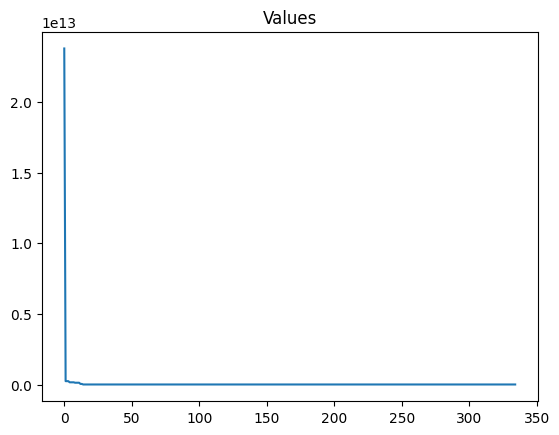

In [10]:
plt.plot(history_book['values'])
plt.title("Values")